**Read data**

In [13]:
import pandas as pd
data1=pd.read_csv("/content/date_count.csv",index_col='Date')
data1

,count
Date,
2012-08-25,3
2012-08-26,3
2012-08-27,2
2012-08-28,2
2012-08-29,2
...,...
2014-03-21,149
2014-03-22,129
2014-03-23,119


**Plot data**

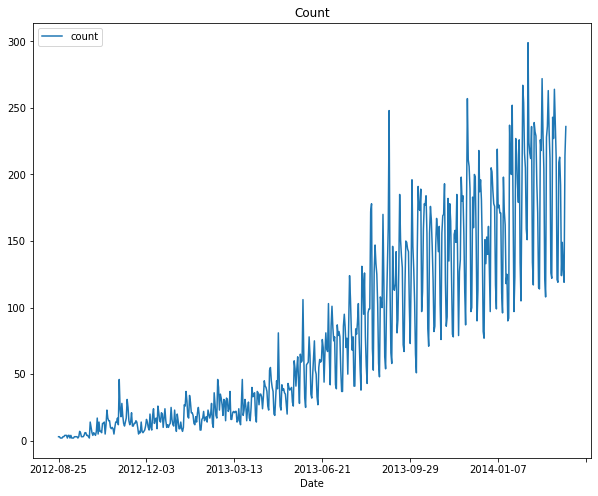

In [14]:
from matplotlib import pyplot
data1.plot(figsize=(10,8))
pyplot.title("Count")
pyplot.show()

**ACF**

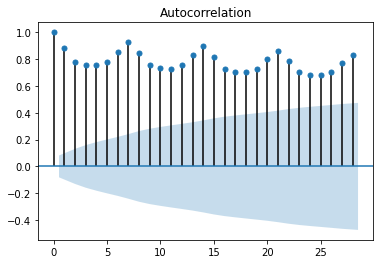

In [15]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data1)
pyplot.show()

**PACF**

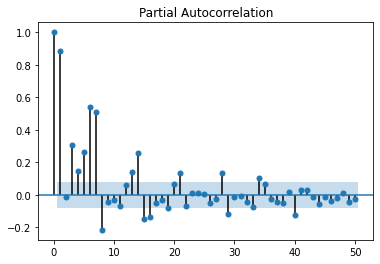

In [16]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data1,lags=50)
pyplot.show()

In [17]:
data2=pd.read_csv("/content/daily-min-temperatures.csv", index_col='Date')
data2

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


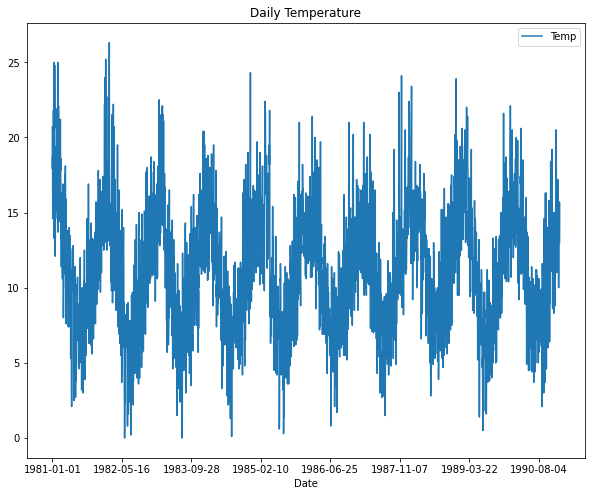

In [18]:
from matplotlib import pyplot
data2.plot(figsize=(10,8))
pyplot.title("Daily Temperature")
pyplot.show()

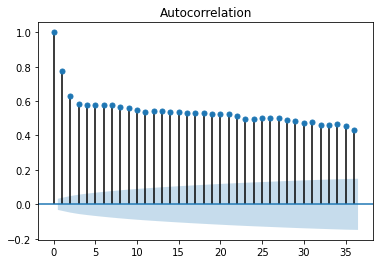

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data2)
pyplot.show()

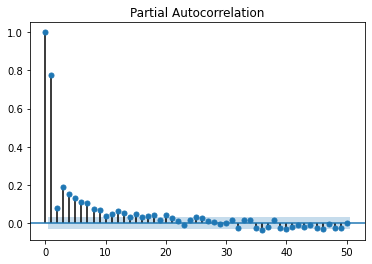

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data2,lags=50)
pyplot.show()

**Plot Histogram**

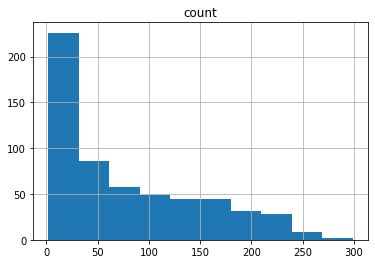

In [22]:
data1.hist()
pyplot.show()

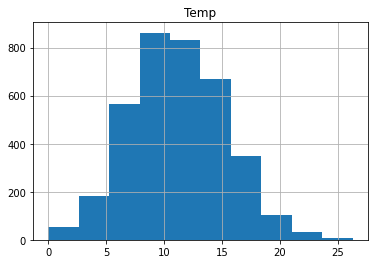

In [23]:
data2.hist()
pyplot.show()

**Find mean and variance**

In [26]:
x=data1.values
split=round(len(x)/2)
x1,x2=x[0:split],x[split:]
m1,m2=x1.mean(),x2.mean()
v1,v2=x1.var(),x2.var()
print('\033[1m'+"First Data"+'\033[0m')
print("Mean")
print(m1,m2)
print("Variance")
print(v1,v2)

First Data
Mean
21.20069204152249 135.16262975778545
Variance
252.03584727194354 3437.9008872020213


In [27]:
x=data2.values
split=round(len(x)/2)
x1,x2=x[0:split],x[split:]
m1,m2=x1.mean(),x2.mean()
v1,v2=x1.var(),x2.var()
print('\033[1m'+"Second Data"+'\033[0m')
print("Mean")
print(m1,m2)
print("Variance")
print(v1,v2)

Second Data
Mean
11.043506849315069 11.312000000000001
Variance
18.160824962281854 14.953757369863014


**Non-stationary to stationary of First data**

---


Log Transform

In [29]:
from numpy import log
x=data1.values
x=log(x)
split=round(len(x)/2)
x1,x2=x[0:split],x[split:]
m1,m2=x1.mean(),x2.mean()
v1,v2=x1.var(),x2.var()
print(m1,m2)

2.746523874238962 4.798954323618007


In [30]:
print(v1,v2)

0.7300477936851332 0.23688017471995437


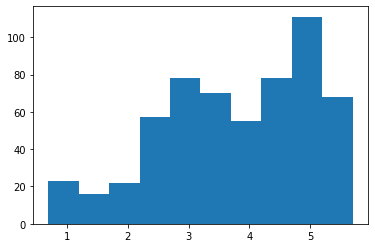

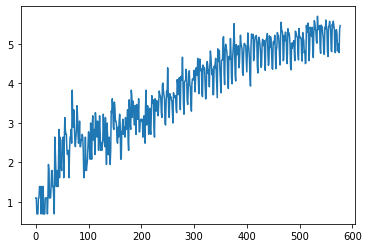

In [31]:
from numpy import log
X=data1.values
X=log(X)
pyplot.hist(X)
pyplot.show()
pyplot.plot(X)
pyplot.show()

**Adfuller Test**

In [56]:
from statsmodels.tsa.stattools import adfuller
data1=pd.read_csv("/content/date_count.csv",index_col='Date',squeeze=True)
X=data1.values
X=log(X)
re=adfuller(X)
print('ADF Statistics = %f'%re[0])
print('Probability value = %f'%re[1])
print('Critical values')
for key,value in re[4].items():
    print('\t%s = %.3f' %(key,value))

ADF Statistics = -2.441499
Probability value = 0.130364
Critical values
	1% = -3.442
	5% = -2.867
	10% = -2.570




---

Square root transform

---



In [37]:
import numpy as np
data1=np.sqrt(data1)
data1

,count
Date,
2012-08-25,1.316074
2012-08-26,1.316074
2012-08-27,1.189207
2012-08-28,1.189207
2012-08-29,1.189207
...,...
2014-03-21,3.493788
2014-03-22,3.370136
2014-03-23,3.302834


In [38]:
X=data1.values
split=round(len(X)/2)
X1,X2=X[0:split],X[split:]
mean1,mean2 = X1.mean(),X2.mean()
var1,var2 = X1.var(),X2.var()
print(mean1,mean2)

2.030930165732385 3.3433534629629653


In [39]:
print(var1,var2)

0.1683045635359344 0.1552041620999026


**Adfuller Test**

In [55]:
from statsmodels.tsa.stattools import adfuller
data1=pd.read_csv("/content/date_count.csv",index_col='Date',squeeze=True)
data1=np.sqrt(data1)
X=data1.values
re=adfuller(X)
print('ADF Statistics = %f'%re[0])
print('Probability value = %f'%re[1])
print('Critical values')
for key,value in re[4].items():
    print('\t%s = %.3f' %(key,value))

ADF Statistics = -0.875606
Probability value = 0.795900
Critical values
	1% = -3.442
	5% = -2.867
	10% = -2.570




---
Differencing

---




In [59]:
data1=pd.read_csv("/content/date_count.csv")
data1['diff_1'] = data1['count'].diff().fillna(0)
data1['diff_2']= data1['count'].diff(periods=2).fillna(0)
data1

,Date,count,diff_1,diff_2
0,2012-08-25,3,0.0,0.0
1,2012-08-26,3,0.0,0.0
2,2012-08-27,2,-1.0,-1.0
3,2012-08-28,2,0.0,-1.0
4,2012-08-29,2,0.0,0.0
...,...,...,...,...
573,2014-03-21,149,25.0,-43.0
574,2014-03-22,129,-20.0,5.0
575,2014-03-23,119,-10.0,-30.0
576,2014-03-24,214,95.0,85.0


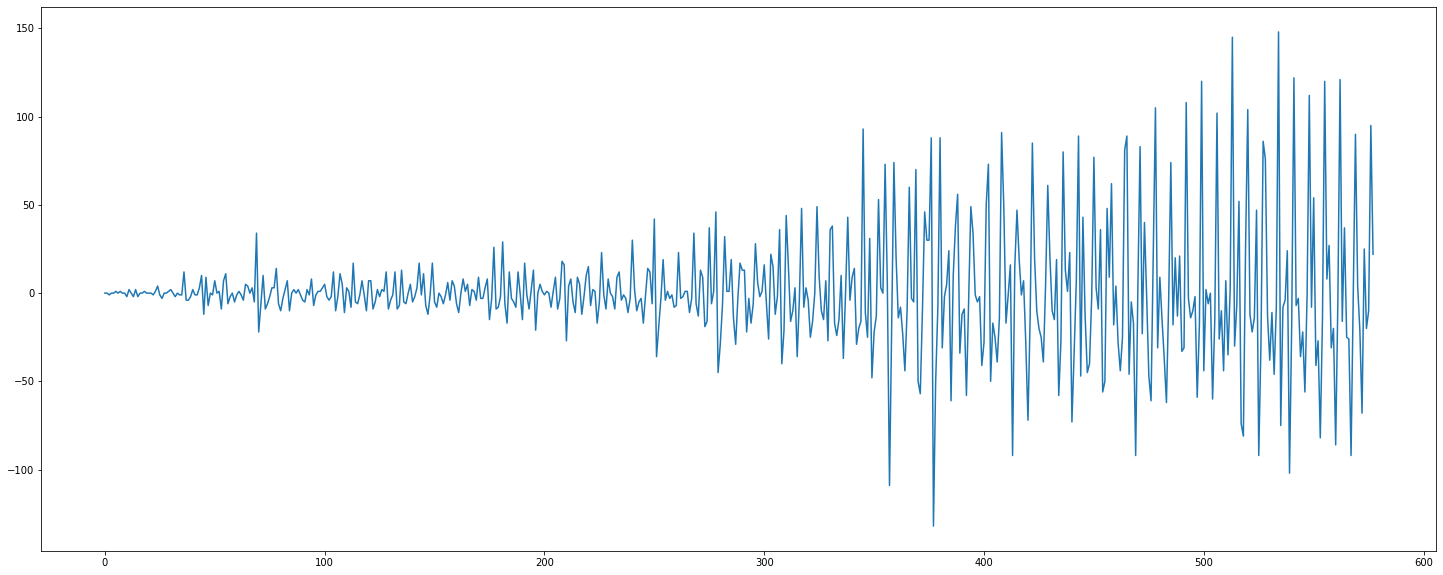

In [63]:
data1["diff_1"].plot(figsize=(25,10))

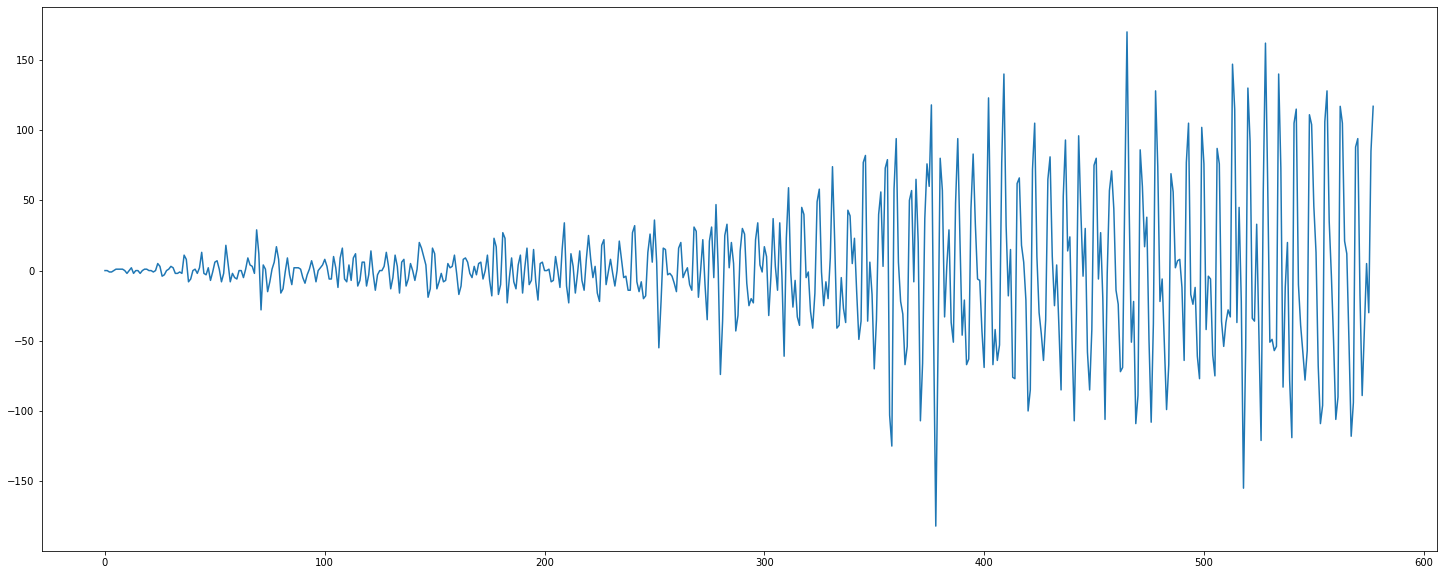

In [62]:
data1["diff_2"].plot(figsize=(25,10))

**Adfuller Test**

In [64]:
x=data1['diff_1'].values
res=adfuller(x)
print('ADF Statistics = %f'%res[0])
print('Probability value = %f'%res[1])
print('Critical values')
for key,value in res[4].items():
    print('\t%s = %.3f' %(key,value))

ADF Statistics = -9.179553
Probability value = 0.000000
Critical values
	1% = -3.442
	5% = -2.867
	10% = -2.570


In [65]:
x=data1['diff_2'].values
res=adfuller(x)
print('ADF Statistics = %f'%res[0])
print('Probability value = %f'%res[1])
print('Critical values')
for key,value in res[4].items():
    print('\t%s = %.3f' %(key,value))

ADF Statistics = -9.000998
Probability value = 0.000000
Critical values
	1% = -3.442
	5% = -2.867
	10% = -2.570
